In [11]:
# 10-1 Clustering Practice

import random
import numpy as np
import matplotlib.pyplot as plt

def kmeans(k, points):
  prev_assignment = []

  centroids = points[np.random.choice(points.shape[0], replace = False, size = k)]

  for epoch in range(10):
    assignments = [assign(p, centroids, k) for p in points]
    centroids = compute_centroids(assignments, points, k)

    if prev_assignment == assignments:
      break

    prev_assignment = assignments

  return assignments, centroids

def assign(point, centroids, k):
  return min(range(k), key = lambda i:np.dot(centroids[i]-point, centroids[i]-point))

def compute_centroids(assignments, points,k):
  vec_sum = [np.zeros(len(points[0])) for _ in range(k)]
  counts = [0]*k

  for i, p in zip(assignments, points):
    vec_sum[i] += p
    counts[i] += i

  return [vec_sum[i]/counts[i] if counts[i]> 0 else random.choice(points) for i in range(k)]

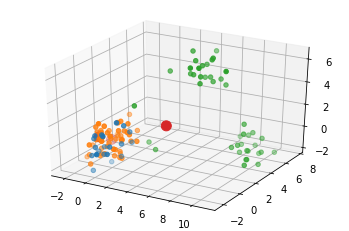

In [12]:
# 데이터 생성
k = 3
points = [np.random.randn(k) for _ in range(80)]
points.extend([np.random.randn(k) + np.array([5, 5, 5]) for _ in range(20)])
points.extend([np.random.randn(k) + np.array([10, 5, 0]) for _ in range(20)])
points = np.array(points)

# kmeans
assignments, centroids = kmeans(k, points)

# result
fig = plt.figure()
ax = fig.gca(projection='3d')
clusters = [[] for _ in range(k)]
for a, p in zip(assignments, points):
  clusters[a].append(p)
for cluster in clusters:
  ax.scatter(*zip(*cluster))
ax.scatter(*zip(*centroids), s=100)
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


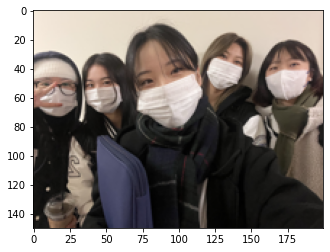

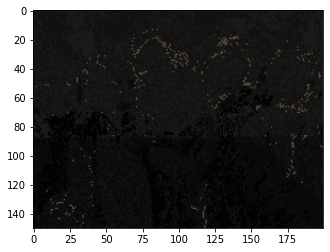

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.


In [13]:
#이미지 처리 응용

from PIL import Image
from google.colab import drive


drive.mount('/content/drive')

im = Image.open("/content/drive/MyDrive/test.jpg")
width = 200
height = im.height * width // im.width
im = im.resize((width, height))

plt.imshow(im)
plt.show()

from sklearn.cluster import KMeans

pixels = np.array(im).reshape(-1,3)
assignments, centroids= kmeans(10, pixels)

for a, i in zip(assignments, range(pixels.shape[0])):
  pixels[i] = centroids[a]
  
im_remastered = Image.fromarray(pixels.reshape(im.height, im.width, 3), 'RGB')
plt.imshow(im_remastered)
plt.show()

# using k-meanssklearn 
kmeans = KMeans(n_clusters=10)
kmeans.fit(pixels)

for a, i in zip(kmeans.labels_, range(pixels.shape[0])):
  pixels[i] = kmeans.cluster_centers_[a]